# **Global Political Compass**
* Authored by Aidan Andrucyk
* June 2020
---



## Keystone Visual
For the viewer's experience, here is the keystone feature of this notebook 

## Importying Libraries & Installing Kaggle

In [313]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

In [314]:
# seaborn styling
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.1)

In [315]:
# install dependencies
!pip install kaggle
# check if Kaggle is installed
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [316]:
# importing from Kaggle
from google.colab import files 
# must temporarily suspend NoScript if installed
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle.json': b'{"username":"aidanandrucyk","key":"06be6062e2e014c897be0ce20145b1ee"}'}

In [317]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change permisssion
!chmod 600 ~/.kaggle/kaggle.json

# CSV Reading, Cleaning, and Merging
Pandas-intensive section



## Human Freedom Index

In [318]:
!kaggle datasets download -d gsutters/the-human-freedom-index

the-human-freedom-index.zip: Skipping, found more recently modified local copy (use --force to force download)


In [319]:
from zipfile import ZipFile
file_name = "the-human-freedom-index.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('CSV Downloaded')

CSV Downloaded


In [320]:
# read csv
hfi = pd.read_csv('hfi_cc_2019.csv')
# display the original (first ten rows only)
hfi.head(10)

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_association,pf_association_assembly,pf_association_political_establish,pf_association_political_operate,pf_association_political,pf_association_prof_establish,pf_association_prof_operate,pf_association_prof,pf_association_sport_establish,pf_association_sport_operate,pf_association_sport,pf_association,pf_expression_killed,pf_expression_jailed,pf_expression_influence,pf_expression_control,pf_expression_cable,pf_expression_newspapers,pf_expression_internet,pf_expression,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_government_consumption,ef_government_transfers,ef_government_enterprises,ef_government_tax_income,ef_government_tax_payroll,ef_government_tax,ef_government_soa,ef_government,ef_legal_judicial,ef_legal_courts,ef_legal_protection,ef_legal_military,ef_legal_integrity,ef_legal_enforcement,ef_legal_restrictions,ef_legal_police,ef_legal_crime,ef_legal_gender,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2017,ALB,Albania,Eastern Europe,7.84,38,1,6.7,4.5,4.7,5.3,9.1,10,10,10,10,10,10,10,-,-,7.5,8.8,9.3,10,10,10,10,-,-,10,9.6,8,9.2,10,10,-,-,10,-,-,10,-,-,10,10,10,10,5,5.3,10,10,10,8.6,0,10,10,10,7.5,5.8,8.01,46,8.1,7.3,8,9,7,8,6.2,7.5,2.5,3.1,4.6,8.3,4.2,4.4,6.6,6.8,6.2,1,5.1,9.3,9.7,9.6,10,9.6,9.6,9.3,8.1,9,6,9.4,7.7,10,6.3,5.4,8.3,6.7,8.3,10,9.1,10,9.7,5.6,5.4,6.4,8,6.3,10,6.9,6.3,6.7,9.7,4.1,6,7.2,6.7,7.8,7.67,30
1,2017,DZA,Algeria,Middle East & North Africa,4.99,155,4,-,-,-,3.8,9.5,10,9.5,5,9.9,9.9,8.9,10,-,-,0,5,7.8,10,5,2.5,5.8,-,-,5,6.9,3,4.9,5,5,-,-,5,-,-,5,-,-,5,5,10,9.5,2.7,4,10,7.5,7.5,7.3,-,0,0,0,0,0,5.2,146,2.7,7.8,0,7,2,4.5,2.9,3.6,4.3,4.3,4.8,4.2,5,4.4,6.6,6.1,6.7,0.8,4.7,7,8.5,8.9,5,7.3,8.5,6.2,5.9,6.9,4.8,0.5,2.6,0,3.7,0,1.1,1.6,2.8,0,5.3,10,5.1,5.6,4.1,6,6,7.8,3,5.4,3.7,1.8,9.3,3.8,8.7,7,5.7,5.4,4.77,159
2,2017,AGO,Angola,Sub-Saharan Africa,5.4,151,4,-,-,-,3.4,8.1,10,9.7,7.5,9.9,7.2,8.9,10,-,-,5,7.5,8.1,5,5,10,6.7,-,-,10,8.9,7.5,8.8,2.5,2.5,-,-,2.5,-,-,5,-,-,7.5,4,10,10,2.7,2.5,7.5,5,7.5,6.5,10,0,0,0,5,5,5.98,121,6.3,8.9,6,10,9,9.5,3.1,6.8,1.4,1.7,3.3,3.3,4.2,2.3,5.5,3.4,4.3,0.8,3,9.4,4.2,3.7,5,5.6,9.2,7.7,4.3,7.1,4.9,2.5,3.7,0,2.9,3.1,0.1,2,3.2,5,9.2,6,6.7,10,4.4,7.2,4,6.6,0,5.4,2.4,1.3,8.7,1.9,8.1,6.8,4.9,5.7,4.83,158
3,2017,ARG,Argentina,Latin America & the Caribbean,6.86,77,2,7.1,5.8,4.3,5.7,8,5,10,7.5,10,10,8.5,10,-,-,10,10,8.8,10,10,10,10,-,-,7.5,9,6.9,7.8,7.5,10,-,-,5,-,-,7.5,-,-,7.5,7.5,10,10,5.7,5.5,10,10,10,8.7,10,10,10,10,10,10,8.04,41,

In [321]:
# Clean Rows
hfi = hfi[~hfi['year'].isin(['2008','2009','2010','2011','2012','2013','2014','2015','2016'])]
# Clean Columns
hfi = hfi.dropna(how='all', axis=1)
hfi = hfi.drop(['hf_quartile', 'pf_association_sport_operate','pf_association_sport_establish', 'pf_association_prof_establish', 'pf_association_prof_operate', 'pf_religion_estop_establish', 'pf_religion_estop_operate','pf_ss_women_inheritance_widows', 'pf_ss_women_inheritance_daughters', 'pf_association_political_establish','year', 'pf_association_political_operate'], axis = 1)
# Clean Country Names
hfi.at[28, 'countries'] = 'Cabo Verde'
hfi.at[29, 'countries'] = 'Central African Republic'
hfi.at[34, 'countries'] = 'Congo, Democratic Republic of the Congo'
hfi.at[35, 'countries'] = 'Congo, Congo, Republic of'
hfi.at[37, 'countries'] = "Côte d'Ivoire"
hfi.at[40, 'countries'] = 'Czech Republic'
hfi.at[42, 'countries'] = 'Dominican Republic'
hfi.at[53, 'countries'] = 'Gambia'
hfi.at[64, 'countries'] = 'Hong Kong SAR'
hfi.at[82, 'countries'] = 'Lao P.D.R.'
hfi.at[116, 'countries'] = 'Papua New Guinea'
hfi.at[132, 'countries'] = 'Slovak Republic'
hfi.at[142, 'countries'] = 'Taiwan '
hfi.at[159, 'countries'] = 'Yemen'
hfi.head(10)

,ISO_code,countries,region,hf_score,hf_rank,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_association,pf_association_assembly,pf_association_political,pf_association_prof,pf_association_sport,pf_association,pf_expression_killed,pf_expression_jailed,pf_expression_influence,pf_expression_control,pf_expression_cable,pf_expression_newspapers,pf_expression_internet,pf_expression,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_government_consumption,ef_government_transfers,ef_government_enterprises,ef_government_tax_income,ef_government_tax_payroll,ef_government_tax,ef_government_soa,ef_government,ef_legal_judicial,ef_legal_courts,ef_legal_protection,ef_legal_military,ef_legal_integrity,ef_legal_enforcement,ef_legal_restrictions,ef_legal_police,ef_legal_crime,ef_legal_gender,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,ALB,Albania,Eastern Europe,7.84,38,6.7,4.5,4.7,5.3,9.1,10,10,10,10,10,10,10,7.5,8.8,9.3,10,10,10,10,10,9.6,8,9.2,10,10,10,10,10,10,10,10,5,5.3,10,10,10,8.6,0,10,10,10,7.5,5.8,8.01,46,8.1,7.3,8,9,7,8,6.2,7.5,2.5,3.1,4.6,8.3,4.2,4.4,6.6,6.8,6.2,1,5.1,9.3,9.7,9.6,10,9.6,9.6,9.3,8.1,9,6,9.4,7.7,10,6.3,5.4,8.3,6.7,8.3,10,9.1,10,9.7,5.6,5.4,6.4,8,6.3,10,6.9,6.3,6.7,9.7,4.1,6,7.2,6.7,7.8,7.67,30
1,DZA,Algeria,Middle East & North Africa,4.99,155,-,-,-,3.8,9.5,10,9.5,5,9.9,9.9,8.9,10,0,5,7.8,10,5,2.5,5.8,5,6.9,3,4.9,5,5,5,5,5,5,10,9.5,2.7,4,10,7.5,7.5,7.3,-,0,0,0,0,0,5.2,146,2.7,7.8,0,7,2,4.5,2.9,3.6,4.3,4.3,4.8,4.2,5,4.4,6.6,6.1,6.7,0.8,4.7,7,8.5,8.9,5,7.3,8.5,6.2,5.9,6.9,4.8,0.5,2.6,0,3.7,0,1.1,1.6,2.8,0,5.3,10,5.1,5.6,4.1,6,6,7.8,3,5.4,3.7,1.8,9.3,3.8,8.7,7,5.7,5.4,4.77,159
2,AGO,Angola,Sub-Saharan Africa,5.4,151,-,-,-,3.4,8.1,10,9.7,7.5,9.9,7.2,8.9,10,5,7.5,8.1,5,5,10,6.7,10,8.9,7.5,8.8,2.5,2.5,2.5,5,7.5,4,10,10,2.7,2.5,7.5,5,7.5,6.5,10,0,0,0,5,5,5.98,121,6.3,8.9,6,10,9,9.5,3.1,6.8,1.4,1.7,3.3,3.3,4.2,2.3,5.5,3.4,4.3,0.8,3,9.4,4.2,3.7,5,5.6,9.2,7.7,4.3,7.1,4.9,2.5,3.7,0,2.9,3.1,0.1,2,3.2,5,9.2,6,6.7,10,4.4,7.2,4,6.6,0,5.4,2.4,1.3,8.7,1.9,8.1,6.8,4.9,5.7,4.83,158
3,ARG,Argentina,Latin America & the Caribbean,6.86,77,7.1,5.8,4.3,5.7,8,5,10,7.5,10,10,8.5,10,10,10,8.8,10,10,10,10,7.5,9,6.9,7.8,7.5,10,5,7.5,7.5,7.5,10,10,5.7,5.5,10,10,10,8.7,10,10,10,10,10,10,8.04,41,5.4,6.3,6,7,1,4,6.9,5.7,3.6,3,4.4,7.5,3.3,3.6,6.9,3.7,4.1,0.8,4,5,6,4.9,10,6.5,6.7,7.3,5.9,6.6,4.6,5.2,4.9,10,5.4,0.8,8,4.7,6.5,5,4.3,9,6.1,2.8,2.2,3.3,10,2.5,10,5.1,2.5,7.1,9.6,3.3,5.4,6.5,5.7,5.6,5.67,147
4,ARM,Armenia,Caucasus & Central Asia,7.42,54,-,-,-,4.9,9,10,10,7.5,10,10,9.5,10,7.5,8.8,9.1,10,5,10,8.3,5,8.6,5.1,6.2,7.5,7.5,5,5,7.5,6.5,10,10,3.3,4.3,7.5,7.5,7.5,7.2,7,10,10,10,7.5,8.2,7.15,72,7.2,7.3,8,5,5,5,9.5,7.4,4,4

In [322]:
# convert scores to numeric type
hfi[["hf_score", "pf_score","ef_score"]] = hfi[["hf_score","pf_score","ef_score"]].apply(pd.to_numeric)
# describe human freedom index
print('Dimensions: ' + str(hfi.shape))
print('Description of Human, Personal, and Economic Freedom Values:')
hfi.describe(include=[np.number])

Dimensions: (162, 108)
Description of Human, Personal, and Economic Freedom Values:


,hf_score,pf_score,ef_score
count,162.000000,162.000000,162.000000
mean,6.887963,6.976852,6.799074
std,1.104117,1.454050,0.933742
min,3.790000,2.530000,2.580000
25%,6.212500,5.972500,6.202500
50%,6.825000,6.950000,6.860000
75%,7.740000,8.040000,7.505000
max,8.880000,9.450000,8.910000


## Economic Freedom Index

In [323]:
!kaggle datasets download -d lewisduncan93/the-economic-freedom-index

the-economic-freedom-index.zip: Skipping, found more recently modified local copy (use --force to force download)


In [324]:
from zipfile import ZipFile
file_name = "the-economic-freedom-index.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('CSV Downloaded')

CSV Downloaded


In [325]:
# read csv and ensure latin-1 encoding
efi = pd.read_csv('economic_freedom_index2019_data.csv', encoding='latin-1')
# display the original (first ten rows only)
efi.head(10)

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,99.3,49.2,60.4,76.7,66.0,10.0,10.0,7.0,20.0,20.0,5.0,25.6,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,69.3,52.7,81.5,87.8,70.0,70.0,1.1,23.0,15.0,24.9,29.5,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,61.6,49.9,74.9,67.4,30.0,30.0,8.8,35.0,23.0,24.5,41.4,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,58.2,55.7,58.8,55.4,61.2,30.0,40.0,9.4,17.0,30.0,20.6,25.3,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,33.0,56.4,46.9,60.2,70.0,55.0,60.0,7.5,35.0,30.0,30.8,41.0,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6
5,6,Armenia,Armenia,Europe,47.0,24.0,67.7,57.2,46.3,38.6,84.7,79.0,53.0,78.3,71.4,77.8,80.8,75.0,70.0,2.1,26.0,20.0,21.3,26.4,Armenia,3.0,$28.3,7.5,3.6,"$9,456",18.2,0.9,245.7,53.5
6,7,Australia,Australia,Asia-Pacific,5.0,4.0,80.9,79.1,86.5,79.9,62.8,60.1,86.2,88.3,84.1,86.6,87.6,80.0,90.0,1.2,45.0,30.0,28.2,36.5,Australia,24.8,"$1,246.5",2.3,2.4,"$50,334",5.6,2.0,"46,368.0",41.6
7,8,Austria,Austria,Europe,31.0,16.0,72.0,84.2,71.3,77.4,50.5,24.5,85.5,74.9,68.7,81.5,86.0,90.0,70.0,2.0,50.0,25.0,42.7,50.2,Austria,8.8,$439.6,2.9,1.3,"$49,869",5.5,2.2,"9,629.6",78.8
8,9,Azerbaijan,Azerbaijan,Asia-Pacific,60.0,13.0,65.4,59.1,53.1,44.7,87.5,59.5,89.4,69.5,63.9,63.0,74.6,60.0,60.0,5.2,25.0,20.0,15.0,36.7,Azerbaijan,9.8,$171.8,0.1,1.2,"$17,492",5.0,13.0,"2,867.0",54.7
9,10,Bahamas,Bahamas,Americas,76.0,15.0,62.9,42.2,46.9,43.7,97.3,86.8,65.7,68.5,67.5,78.1,47.8,50.0,60.0,18.6,0.0,0.0,16.3,21.0,Bahamas,0.4,$11.6,1.3,-0.7,"$31,139",12.6,1.4,927.7,57.2


In [326]:
# describe economic freedom index (no cleaning necessary)
print('Dimensions: ' + str(efi.shape))
print('Description of Types of Economic Freedom:')
efi.describe(include=[np.number])

Dimensions: (186, 34)
Description of Types of Economic Freedom:


,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,GDP Growth Rate (%),5 Year GDP Growth Rate (%),Inflation (%),Public Debt (% of GDP)
count,186.000000,180.000000,180.000000,180.000000,185.000000,185.000000,185.000000,180.000000,183.000000,183.000000,185.000000,184.000000,184.000000,182.000000,184.000000,181.000000,182.000000,183.000000,183.000000,179.000000,182.000000,184.000000,183.000000,182.000000,182.000000
mean,93.500000,90.500000,20.538889,60.768333,52.327568,44.899459,41.470270,77.212778,64.203825,65.996721,63.514054,59.442391,75.073913,74.260989,57.255435,48.784530,5.986813,28.183060,23.891257,22.157542,33.863736,3.470109,2.984153,10.586264,56.469231
std,53.837719,52.105662,12.738611,11.255725,19.608526,18.104745,19.793193,13.208314,23.150984,31.764160,15.799326,14.355747,11.224099,12.261766,22.572167,19.483982,5.533568,13.374339,8.858207,10.152671,15.476484,5.835732,2.926503,80.507501,34.163855
min,1.000000,1.000000,1.000000,5.900000,7.600000,5.000000,7.900000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000,10.600000,-14.000000,-16.100000,-0.900000,0.000000
25%,47.250000,45.750000,9.750000,53.950000,37.000000,31.000000,27.200000,70.975000,51.700000,39.900000,54.100000,50.700000,71.650000,66.650000,45.000000,30.000000,2.000000,20.000000,20.000000,14.250000,24.675000,1.800000,1.900000,1.300000,34.950000
50%,93.500000,90.500000,19.500000,60.750000,50.100000,42.900000,35.500000,78.050000,68.800000,80.300000,64.300000,59.900000,77.800000,76.100000,60.000000,50.000000,4.300000,30.000000,25.000000,20.700000,32.350000,3.200000,3.000000,2.750000,49.900000
75%,139.750000,135.250000,31.000000,67.800000,65.900000,54.700000,50.300000,85.425000,82.600000,91.450000,75.000000,68.475000,81.725000,84.300000,75.000000,60.000000,8.775000,35.000000,30.000000,29.850000,40.225000,4.650000,4.450000,5.450000,70.125000
max,186.000000,180.000000,47.000000,90.200000,97.400000,92.400000,96.700000,99.800000,96.600000,100.000000,96.400000,91.000000,88.000000,95.000000,95.000000,90.000000,50.000000,60.000000,50.000000,47.000000,139.200000,70.800000,9.900000,1087.500000,236.400000


## Merged Freedom Index


In [327]:
# identify countries that are not shared
unsharedCountries = set(hfi.countries).symmetric_difference(efi.Country)
print("Unshared Countries" + str(unsharedCountries))
# remove unshared countries in each data frame
for nation in unsharedCountries:
  hfi.drop(hfi.loc[hfi['countries']==nation].index, inplace=True)
  efi.drop(efi.loc[efi['Country']==nation].index, inplace=True)
print('Human Freedom Index: ' + str(hfi.shape)) 
hfi = hfi.reset_index(drop=True)
print('Economic Freedom Index: ' + str(efi.shape))
efi = efi.reset_index(drop=True)

Unshared Countries{'Samoa', 'Liechtenstein', 'North Macedonia', 'Uzbekistan', 'Micronesia', 'Kosovo', 'Saint Vincent and the Grenadines', 'Equatorial Guinea', 'Comoros', 'Burma', 'Afghanistan', 'Somalia', 'Solomon Islands', 'Vanuatu', 'Saint Lucia', 'Myanmar', 'Maldives', 'São Tomé and Príncipe', 'Macedonia', 'Congo, Republic of', 'Kiribati', 'Djibouti', 'Cuba', 'Macau', 'Dominica', 'Congo, Congo, Republic of', 'Turkmenistan', 'Tonga', 'Korea, North ', 'Eritrea'}
Human Freedom Index: (159, 108)
Economic Freedom Index: (159, 34)


In [328]:
# combine & reformat dataframes
hfi = hfi[['ISO_code', 'region', 'countries','hf_score', 'pf_score', 'ef_score']]
hfi = hfi.rename(columns={'region': 'Region', 
                          'ISO_code': 'ISO Code',
                          'countries': 'Countries',
                          'hf_score': 'Human Freedom Score',
                          'pf_score': 'Personal Freedom Score',
                          'ef_score': 'Economic Freedom Score'})
efi = efi[['CountryID', 'Country', '2019 Score']]
efi = efi.rename(columns={'Country': 'Countries',
                          '2019 Score': 'Economic Index Score'})
# merge dataframes
mfi = pd.merge(efi, hfi, on='Countries')
mfi = mfi[['CountryID','Countries', 'ISO Code', 'Region', 'Human Freedom Score', 'Personal Freedom Score', 'Economic Index Score']]
# semi-normalize factors
mfi.fillna(0)

medVal = mfi['Human Freedom Score'].median()
mfi['Human Freedom Score'] = (mfi['Human Freedom Score']-medVal)
maxVal = mfi['Human Freedom Score'].max() if mfi['Human Freedom Score'].max() >= -mfi['Human Freedom Score'].min() else mfi['Human Freedom Score'].min()
mfi['Human Freedom Score'] = ((mfi['Human Freedom Score'])/abs(maxVal))

medVal = mfi['Personal Freedom Score'].median()
mfi['Personal Freedom Score'] = (mfi['Personal Freedom Score']-medVal)
maxVal = mfi['Personal Freedom Score'].max() if mfi['Personal Freedom Score'].max() >= -mfi['Personal Freedom Score'].min() else mfi['Personal Freedom Score'].min()
mfi['Personal Freedom Score'] = ((mfi['Personal Freedom Score'])/abs(maxVal))

medVal = mfi['Economic Index Score'].median()
mfi['Economic Index Score'] = (mfi['Economic Index Score']-medVal)
maxVal = mfi['Economic Index Score'].max() if mfi['Economic Index Score'].max() >= -mfi['Economic Index Score'].min() else mfi['Economic Index Score'].min()
mfi['Economic Index Score'] = ((mfi['Economic Index Score'])/abs(maxVal))

# final merged index
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Merged Data Analysis

## Complete Data Set

In [329]:
# merged data in full
display(mfi)
# describing scores
mfi[['Human Freedom Score', 'Personal Freedom Score', 'Economic Index Score']].describe()

,CountryID,Countries,ISO Code,Region,Human Freedom Score,Personal Freedom Score,Economic Index Score
0,2,Albania,ALB,Eastern Europe,0.332237,0.234234,0.130919
1,3,Algeria,DZA,Middle East & North Africa,-0.605263,-0.398649,-0.434540
2,4,Angola,AGO,Sub-Saharan Africa,-0.470395,-0.222973,-0.311978
3,5,Argentina,ARG,Latin America & the Caribbean,0.009868,0.240991,-0.267409
4,6,Armenia,ARM,Caucasus & Central Asia,0.194079,0.040541,0.164345
5,7,Australia,AUS,Oceania,0.588816,0.493243,0.532033
6,8,Austria,AUT,Western Europe,0.542763,0.513514,0.284123
7,9,Azerbaijan,AZE,Caucasus & Central Asia,-0.200658,-0.195946,0.100279
8,10,Bahamas,BHS,Latin America & the Caribbean,0.240132,0.202703,0.030641
9,11,Bahrain,BHR,Middle East & North Africa,-0.065789,-0.238739,0.128134


,Human Freedom Score,Personal Freedom Score,Economic Index Score
count,159.000000,159.000000,155.000000
mean,0.023378,0.003655,0.009381
std,0.363333,0.328812,0.280689
min,-1.000000,-1.000000,-1.000000
25%,-0.197368,-0.224099,-0.179666
50%,0.000000,0.000000,0.000000
75%,0.305921,0.244369,0.185237
max,0.674342,0.558559,0.791086


An interesting takeaway might be that the freedom scores are always scaled to the minimum as relatively left-authoritarian states seem to exist in greater extremities but in lesser frequencies when compared to their right-libertarian counterpart. 

In [330]:
# convert to excel spreadsheet (found in Files on left bar)
mfi.to_excel('MergedFreedomIndices.xlsx', index = False)
mfi.to_csv('MergedFreedomIndices.csv', index = False)

## Ideological Breakdown


In [331]:
# add ideology column
Ideology = ["Empty"] * mfi.index.size
mfi['Ideology'] = Ideology 
# Assigning ideologies
for indexNum in mfi.index:
    if  mfi.loc[indexNum, 'Economic Index Score'] > .12:
      if  mfi.loc[indexNum, 'Personal Freedom Score'] < .12 and mfi.loc[indexNum, 'Personal Freedom Score'] > -.12:
        mfi.loc[indexNum, "Ideology"] = "Right"
      elif  mfi.loc[indexNum, 'Personal Freedom Score'] < -.12:
        mfi.loc[indexNum, "Ideology"] = "Authoritarian Right"
      elif  mfi.loc[indexNum, 'Personal Freedom Score'] > .12:
        mfi.loc[indexNum, "Ideology"] = "Libertarian Right"
    elif  mfi.loc[indexNum, 'Economic Index Score'] < -.12:
      if  mfi.loc[indexNum, 'Personal Freedom Score'] < .12 and mfi.loc[indexNum, 'Personal Freedom Score'] > -.12:
        mfi.loc[indexNum, "Ideology"] = "Left"
      elif  mfi.loc[indexNum, 'Personal Freedom Score'] < -.12:
        mfi.loc[indexNum, "Ideology"] = "Authoritarian Left"
      elif  mfi.loc[indexNum, 'Personal Freedom Score'] > .12:
        mfi.loc[indexNum, "Ideology"] = "Libertarian Left"
    else :
      if mfi.loc[indexNum, 'Personal Freedom Score'] > .12:
        mfi.loc[indexNum, "Ideology"] = "Libertarian"
      elif mfi.loc[indexNum, 'Personal Freedom Score'] < -.12:
        mfi.loc[indexNum, "Ideology"] = "Authoritarian"
      else:
        mfi.loc[indexNum, "Ideology"] = "Centrist"
mfi.to_csv('merged_freedom_index_with_ideologies.csv', index = False)
mfi[['Countries', 'Ideology']]

,Countries,Ideology
0,Albania,Libertarian Right
1,Algeria,Authoritarian Left
2,Angola,Authoritarian Left
3,Argentina,Libertarian Left
4,Armenia,Right
5,Australia,Libertarian Right
6,Austria,Libertarian Right
7,Azerbaijan,Authoritarian
8,Bahamas,Libertarian
9,Bahrain,Authoritarian Right


## Regional Breakdown

In [332]:
test = mfi[mfi['Region'] == 'North America']
test.head()

,CountryID,Countries,ISO Code,Region,Human Freedom Score,Personal Freedom Score,Economic Index Score,Ideology
27,29,Canada,CAN,North America,0.598684,0.506757,0.442897,Libertarian Right
152,175,United States,USA,North America,0.536184,0.394144,0.417827,Libertarian Right


In [333]:
# creates dataframes for each region

# north america
NAmfi = mfi[mfi['Region'] == 'North America']
# latin america & the caribbean	
LAmfi = mfi[mfi['Region'] == 'Latin America & the Caribbean']
# eastern europe
EEmfi = mfi[mfi['Region'] == 'Eastern Europe']
# western europe
WEmfi = mfi[mfi['Region'] == 'Western Europe']
# middle east & north africa
MEmfi = mfi[mfi['Region'] == 'Middle East & North Africa']
# sub-saharan africa
SSmfi = mfi[mfi['Region'] == 'Sub-Saharan Africa']
# caucasus & central asia	
CCmfi = mfi[mfi['Region'] == 'Caucasus & Central Asia']
# south asia
SAmfi = mfi[mfi['Region'] == 'South Asia']
# east asia
EAmfi = mfi[mfi['Region'] == 'East Asia']
# oceania
Omfi = mfi[mfi['Region'] == 'Oceania']

In [334]:
# north america
display(NAmfi[['Countries','Region']])
NAmfi.to_csv('north_america_mfi.csv', index = False)
NAmfi.describe()

,Countries,Region
27,Canada,North America
152,United States,North America


,CountryID,Human Freedom Score,Personal Freedom Score,Economic Index Score
count,2.00000,2.000000,2.000000,2.000000
mean,102.00000,0.567434,0.450450,0.430362
std,103.23759,0.044194,0.079629,0.017727
min,29.00000,0.536184,0.394144,0.417827
25%,65.50000,0.551809,0.422297,0.424095
50%,102.00000,0.567434,0.450450,0.430362
75%,138.50000,0.583059,0.478604,0.436630
max,175.00000,0.598684,0.506757,0.442897


In [335]:
# latin america & the caribbean	
display(LAmfi[['Countries','Region']])
LAmfi.to_csv('latin_america_mfi.csv', index = False)
LAmfi.describe()

,Countries,Region
3,Argentina,Latin America & the Caribbean
8,Bahamas,Latin America & the Caribbean
11,Barbados,Latin America & the Caribbean
14,Belize,Latin America & the Caribbean
17,Bolivia,Latin America & the Caribbean
20,Brazil,Latin America & the Caribbean
31,Chile,Latin America & the Caribbean
33,Colombia,Latin America & the Caribbean
35,Costa Rica,Latin America & the Caribbean
41,Dominican Republic,Latin America & the Caribbean


,CountryID,Human Freedom Score,Personal Freedom Score,Economic Index Score
count,26.000000,26.000000,26.000000,26.000000
mean,76.423077,0.039980,0.048510,-0.085708
std,55.532458,0.253846,0.171014,0.285069
min,5.000000,-0.996711,-0.436937,-1.000000
25%,33.500000,-0.023849,-0.055180,-0.234680
50%,66.500000,0.027961,0.038288,-0.011142
75%,125.500000,0.190789,0.162725,0.093315
max,179.000000,0.434211,0.326577,0.378830


In [336]:
# eastern europe
display(EEmfi[['Countries','Region']])
EEmfi.to_csv('eastern_europe_mfi.csv', index = False)
EEmfi.describe()

,Countries,Region
0,Albania,Eastern Europe
12,Belarus,Eastern Europe
18,Bosnia and Herzegovina,Eastern Europe
22,Bulgaria,Eastern Europe
37,Croatia,Eastern Europe
38,Cyprus,Eastern Europe
39,Czech Republic,Eastern Europe
45,Estonia,Eastern Europe
56,Greece,Eastern Europe
64,Hungary,Eastern Europe


,CountryID,Human Freedom Score,Personal Freedom Score,Economic Index Score
count,21.000000,21.000000,21.000000,21.000000
mean,86.142857,0.259085,0.238631,0.087810
std,52.505510,0.209767,0.186485,0.171026
min,2.000000,-0.187500,-0.240991,-0.264624
25%,43.000000,0.164474,0.234234,-0.036212
50%,92.000000,0.315789,0.247748,0.089136
75%,135.000000,0.391447,0.353604,0.189415
max,172.000000,0.536184,0.461712,0.412256


In [337]:
# western europe
display(WEmfi[['Countries','Region']])
WEmfi.to_csv('western_europe_mfi.csv', index = False)
WEmfi.describe()

,Countries,Region
6,Austria,Western Europe
13,Belgium,Western Europe
40,Denmark,Western Europe
49,Finland,Western Europe
50,France,Western Europe
54,Germany,Western Europe
65,Iceland,Western Europe
70,Ireland,Western Europe
72,Italy,Western Europe
88,Luxembourg,Western Europe


,CountryID,Human Freedom Score,Personal Freedom Score,Economic Index Score
count,18.000000,18.000000,18.000000,18.000000
mean,94.388889,0.520651,0.472723,0.304704
std,49.519027,0.066183,0.055760,0.165181
min,8.000000,0.391447,0.382883,0.011142
25%,59.000000,0.486842,0.426239,0.162256
50%,89.500000,0.541118,0.493243,0.345404
75%,130.750000,0.558388,0.515203,0.417131
max,174.000000,0.654605,0.558559,0.559889


In [338]:
# middle east & north africa
display(MEmfi[['Countries','Region']])
MEmfi.to_csv('middle_east_north_africa_mfi.csv', index = False)
MEmfi.describe()

,Countries,Region
1,Algeria,Middle East & North Africa
9,Bahrain,Middle East & North Africa
43,Egypt,Middle East & North Africa
68,Iran,Middle East & North Africa
69,Iraq,Middle East & North Africa
71,Israel,Middle East & North Africa
75,Jordan,Middle East & North Africa
79,Kuwait,Middle East & North Africa
83,Lebanon,Middle East & North Africa
86,Libya,Middle East & North Africa


,CountryID,Human Freedom Score,Personal Freedom Score,Economic Index Score
count,19.000000,19.000000,19.000000,15.000000
mean,106.473684,-0.380021,-0.422594,-0.008914
std,52.483191,0.339617,0.291639,0.251434
min,3.000000,-1.000000,-1.000000,-0.434540
25%,78.000000,-0.662829,-0.578829,-0.218663
50%,96.000000,-0.246711,-0.398649,-0.022284
75%,150.500000,-0.207237,-0.231982,0.129526
max,181.000000,0.256579,0.164414,0.440111


In [339]:
# sub-saharan africa
display(SSmfi[['Countries','Region']])
SSmfi.to_csv('sub_saharan_africa_mfi.csv', index = False)
SSmfi.describe()

,Countries,Region
2,Angola,Sub-Saharan Africa
15,Benin,Sub-Saharan Africa
19,Botswana,Sub-Saharan Africa
23,Burkina Faso,Sub-Saharan Africa
24,Burundi,Sub-Saharan Africa
26,Cameroon,Sub-Saharan Africa
28,Cabo Verde,Sub-Saharan Africa
29,Central African Republic,Sub-Saharan Africa
30,Chad,Sub-Saharan Africa
34,"Congo, Democratic Republic of the Congo",Sub-Saharan Africa


,CountryID,Human Freedom Score,Personal Freedom Score,Economic Index Score
count,41.000000,41.000000,41.000000,41.000000
mean,93.536585,-0.193437,-0.163755,-0.178884
std,53.060389,0.222175,0.198997,0.179992
min,4.000000,-0.825658,-0.675676,-0.596100
25%,40.000000,-0.388158,-0.279279,-0.311978
50%,102.000000,-0.167763,-0.157658,-0.186630
75%,143.000000,-0.032895,0.000000,-0.097493
max,183.000000,0.226974,0.173423,0.311978


In [340]:
# caucasus & central asia	
display(CCmfi[['Countries','Region']])
CCmfi.to_csv('central_asia_mfi.csv', index = False)
CCmfi.describe()

,Countries,Region
4,Armenia,Caucasus & Central Asia
7,Azerbaijan,Caucasus & Central Asia
53,Georgia,Caucasus & Central Asia
76,Kazakhstan,Caucasus & Central Asia
80,Kyrgyz Republic,Caucasus & Central Asia
140,Tajikistan,Caucasus & Central Asia


,CountryID,Human Freedom Score,Personal Freedom Score,Economic Index Score
count,6.00000,6.000000,6.000000,6.000000
mean,68.50000,0.002741,-0.067943,0.099814
std,57.89905,0.241676,0.169506,0.185269
min,6.00000,-0.348684,-0.333333,-0.172702
25%,22.00000,-0.144737,-0.162725,0.035515
50%,72.50000,0.036184,-0.022523,0.100279
75%,88.50000,0.157895,0.034910,0.148329
max,161.00000,0.299342,0.126126,0.392758


In [341]:
# south asia
display(SAmfi[['Countries','Region']])
SAmfi.to_csv('south_asia_mfi.csv', index = False)
SAmfi.describe()

,Countries,Region
10,Bangladesh,South Asia
16,Bhutan,South Asia
21,Brunei Darussalam,South Asia
25,Cambodia,South Asia
66,India,South Asia
67,Indonesia,South Asia
81,Lao P.D.R.,South Asia
91,Malaysia,South Asia
103,Nepal,South Asia
111,Pakistan,South Asia


,CountryID,Human Freedom Score,Personal Freedom Score,Economic Index Score
count,16.000000,16.000000,16.000000,16.000000
mean,110.562500,-0.098067,-0.166385,-0.015320
std,56.715628,0.195614,0.162529,0.286685
min,12.000000,-0.375000,-0.497748,-0.490251
25%,74.750000,-0.185033,-0.279279,-0.181755
50%,122.000000,-0.100329,-0.150901,-0.116992
75%,155.500000,-0.017270,-0.114302,0.096797
max,186.000000,0.421053,0.123874,0.768802


In [342]:
# east asia
display(EAmfi[['Countries','Region']])
SAmfi.to_csv('south_asia_mfi.csv', index = False)
EAmfi.describe()

,Countries,Region
32,China,East Asia
63,Hong Kong SAR,East Asia
74,Japan,East Asia
78,"Korea, South",East Asia
98,Mongolia,East Asia
139,Taiwan,East Asia


,CountryID,Human Freedom Score,Personal Freedom Score,Economic Index Score
count,6.000000,6.000000,6.000000,6.000000
mean,91.333333,0.355811,0.264264,0.254875
std,42.387105,0.308183,0.262016,0.355267
min,34.000000,-0.217105,-0.236486,-0.178273
25%,73.750000,0.305099,0.235923,0.000696
50%,85.000000,0.463816,0.389640,0.289694
75%,106.750000,0.506579,0.408221,0.396936
max,160.000000,0.651316,0.443694,0.791086


In [343]:
# oceania
display(Omfi[['Countries','Region']])
Omfi.to_csv('oceania_mfi.csv', index = False)
Omfi.describe()

,Countries,Region
5,Australia,Oceania
48,Fiji,Oceania
105,New Zealand,Oceania
113,Papua New Guinea,Oceania


,CountryID,Human Freedom Score,Personal Freedom Score,Economic Index Score
count,4.000000,4.000000,4.000000,4.000000
mean,77.750000,0.324836,0.281532,0.269499
std,57.121946,0.364052,0.268469,0.364206
min,7.000000,-0.075658,-0.029279,-0.094708
25%,43.750000,0.064967,0.100788,-0.015320
50%,88.000000,0.350329,0.318694,0.271588
75%,122.000000,0.610197,0.499437,0.556407
max,128.000000,0.674342,0.518018,0.629526


# Matplotlib Visualizations


## Distribution Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e734a6c18>,
      dtype=object)

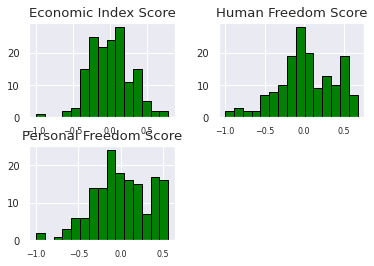

In [344]:
# histograms
histograms = mfi.hist(['Human Freedom Score','Personal Freedom Score', 'Economic Index Score'],
                      xlabelsize=8, 
                      ylabelsize=10, 
                      facecolor='green',
                      bins=15, 
                      label='Count', 
                      edgecolor='black', 
                      linewidth=1);
histograms

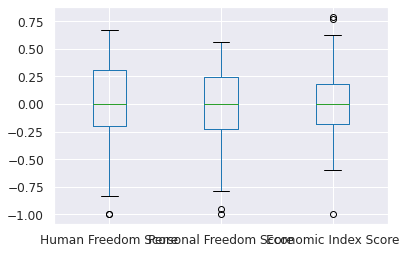

In [345]:
# box and whisker plot
boxes = mfi[['Human Freedom Score',
             'Personal Freedom Score',
             'Economic Index Score']].plot(kind='box');

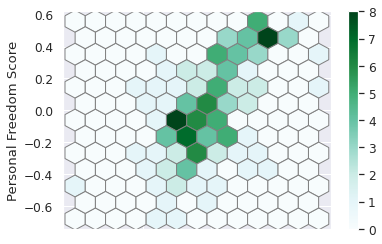

In [346]:
# Hexbin
mfi.plot.hexbin('Economic Index Score',
                'Personal Freedom Score', 
                color = 'grey', 
                reduce_C_function=np.max, 
                gridsize=12)

# Seaborn Visualizations

## Distribution Plots

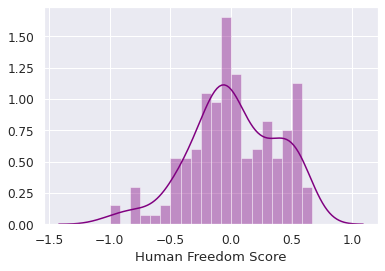

In [347]:
# histogram of MFI Human Freedom Score
sns.distplot(mfi['Human Freedom Score'], 
             bins = 20,
             color='purple',
             )

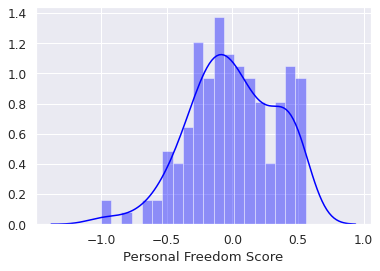

In [348]:
# histogram of MFI Personal Freedom Score
sns.distplot(mfi['Personal Freedom Score'], 
             bins = 20,
             color='blue' )

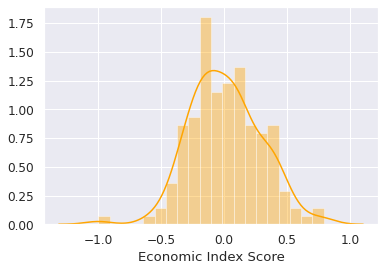

In [349]:
# histogram of MFI Economic Index Score
sns.distplot(
    mfi['Economic Index Score'], 
    bins = 20,
    color='orange')

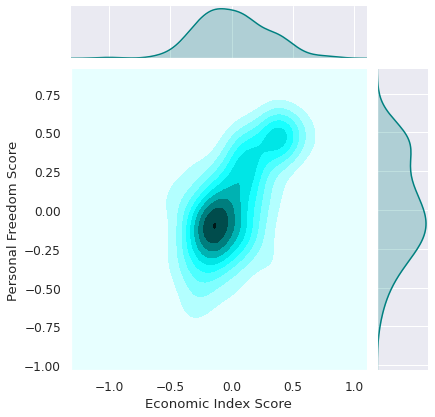

In [350]:
# Kernel Density Estimation Joint Plot
sns.jointplot(
    x='Economic Index Score',
    y='Personal Freedom Score',
    data=mfi,
    kind='kde',
    color='teal')

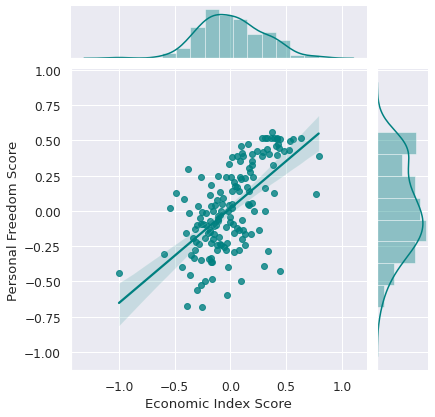

In [351]:
# Regression Joint Plot
sns.jointplot(
    x='Economic Index Score',
    y='Personal Freedom Score',
    data=mfi,
    kind='regression',
    color='teal')

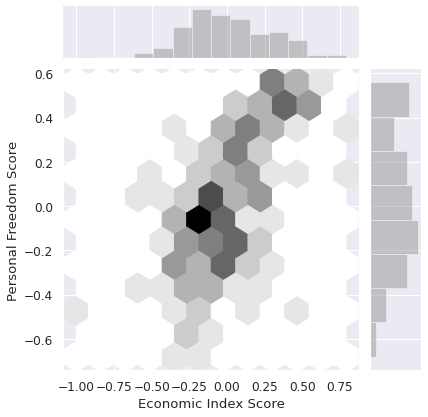

In [352]:
# Kernel Density Estimation Joint Plot
sns.jointplot(
    x='Economic Index Score',
    y='Personal Freedom Score',
    data=mfi,
    kind='hex',
    color='grey')

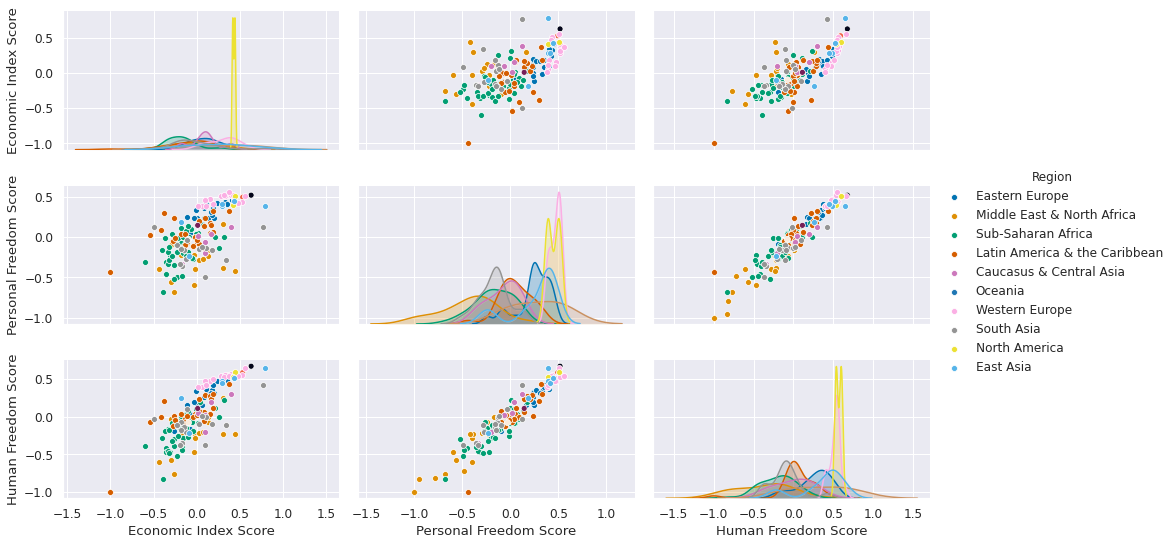

In [353]:
# Pairplot by Region: KDE Diagonal and Scatter Off-Diagonals
sns.pairplot(data=mfi,
             vars=['Economic Index Score', 'Personal Freedom Score', 'Human Freedom Score'],
             hue='Region',
             palette='colorblind',
             aspect=1.75)

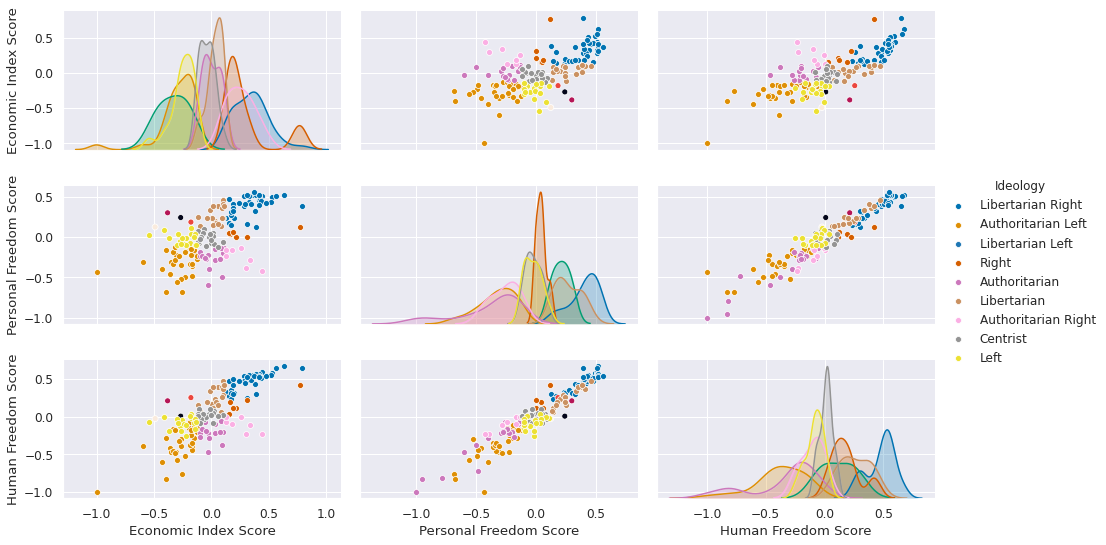

In [354]:
# Pairplot by Idealogy: KDE Diagonal and Scatter Off-Diagonals
sns.pairplot(data=mfi,
             vars=['Economic Index Score', 'Personal Freedom Score', 'Human Freedom Score'],
             hue='Ideology',
             palette='colorblind',
             aspect=1.75)

## Catergorical Plots

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

<Figure size 576x288 with 0 Axes>

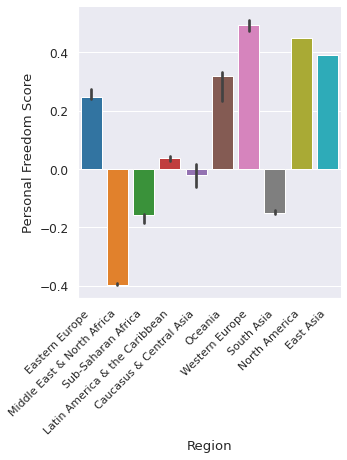

In [355]:
# average personal score barchart grouped by region

#increase size
plt.figure(figsize=(8,4))

# create fig
fig = sns.catplot(
            x='Region', 
            y='Personal Freedom Score',
            #col='Region',
            data=mfi,
            ci=30,
            kind='bar',
            estimator=np.median) 

# rotate ticklabels
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

<Figure size 576x288 with 0 Axes>

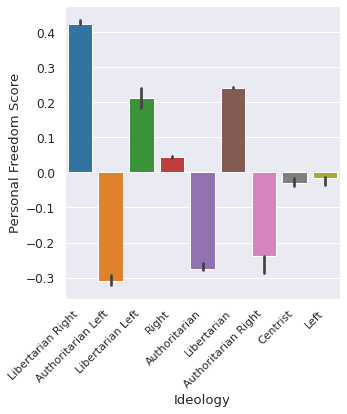

In [356]:
# average personal score barchart grouped by ideology

#increase size
plt.figure(figsize=(8,4))

# create fig
fig = sns.catplot(
            x='Ideology', 
            y='Personal Freedom Score',
            #col='Region',
            data=mfi,
            ci=30,
            kind='bar',
            estimator=np.median) 

# rotate ticklabels
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

<Figure size 576x288 with 0 Axes>

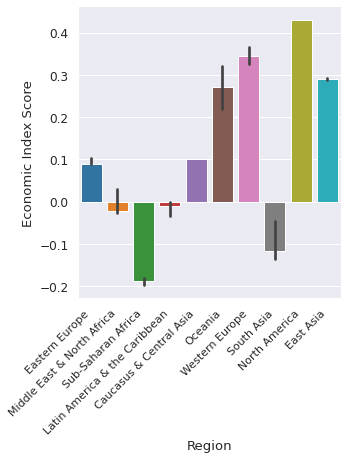

In [357]:
# average economic score barchart grouped by region

#increase size
plt.figure(figsize=(8,4))

# create fig
fig = sns.catplot(
            x='Region', 
            y='Economic Index Score',
            #col='Ideology',
            data=mfi,
            ci=30,
            kind='bar',
            estimator=np.median) 

# rotate ticklabels
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

<Figure size 576x288 with 0 Axes>

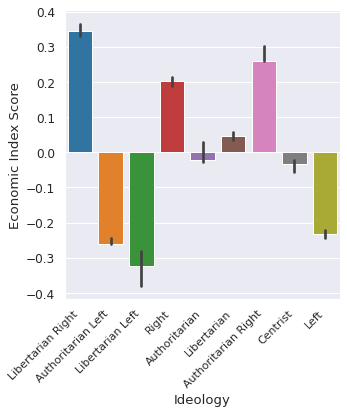

In [358]:
# average economic score barchart grouped by ideology

#increase size
plt.figure(figsize=(8,4))

# create fig
fig = sns.catplot(
            x='Ideology', 
            y='Economic Index Score',
            #col='Region',
            data=mfi,
            ci=30,
            kind='bar',
            estimator=np.median) 

# rotate ticklabels
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

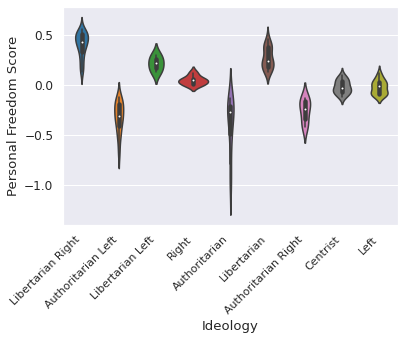

In [359]:
# personal freedom score violin plot grouped by idealogy

# create fig
sns.violinplot(
    x='Ideology',
    y='Personal Freedom Score',
    data=mfi)

# rotate ticklabels
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

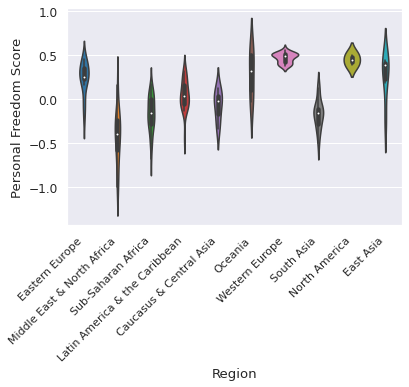

In [360]:
# personal freedom score violin plot grouped by region

# create fig
sns.violinplot(
    x='Region',
    y='Personal Freedom Score',
    data=mfi)

# rotate ticklabels
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

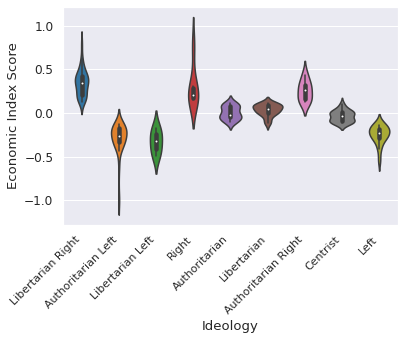

In [361]:
# economic score violin plot grouped by idealogy

# create fig
sns.violinplot(
    x='Ideology',
    y='Economic Index Score',
    data=mfi)

# rotate ticklabels
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

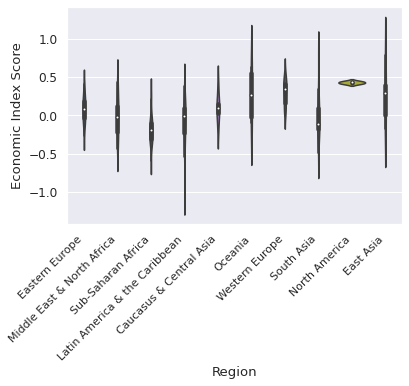

In [362]:
# economic score violin plot grouped by region

# create fig
sns.violinplot(
    x='Region',
    y='Economic Index Score',
    data=mfi)

# rotate ticklabels
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)

## Matrix Plots

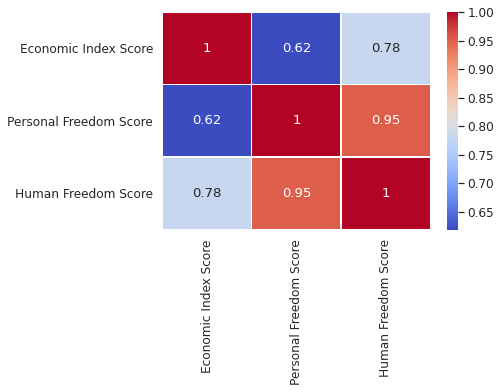

In [363]:
# correlation plot

# merged freedom correlation index
mfi_corr_matrix = mfi[['Economic Index Score', 'Personal Freedom Score', 'Human Freedom Score']].corr()
sns.heatmap(mfi_corr_matrix,
            annot=True,
            cmap='coolwarm',
            linewidths = .5)

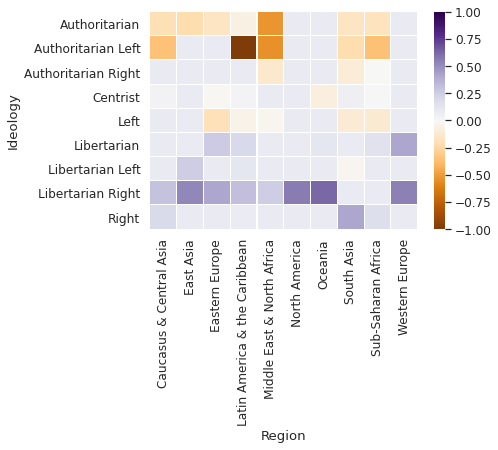

In [364]:
# heatmap of Ideology and Region on pivot of Human Freedom Score
# create pivot tables
fp = mfi.pivot_table(index='Ideology', columns='Region', values='Human Freedom Score')
sns.heatmap(
    data=fp,
    cmap='PuOr',
    linecolor='white',
    linewidths=.1,
    vmin=-1,
    vmax=1,
    center=0)

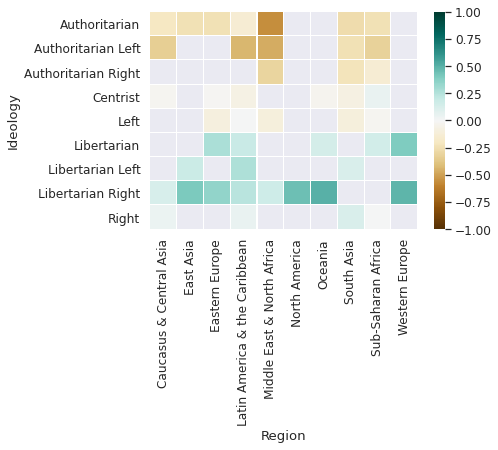

In [365]:
# heatmap of Ideology and Region on pivot of Personal Freedom Score
# create pivot tables
fp = mfi.pivot_table(index='Ideology', columns='Region', values='Personal Freedom Score')
sns.heatmap(
    data=fp,
    cmap='BrBG',
    linecolor='white',
    linewidths=.1,
    vmin=-1,
    vmax=1,
    center=0)

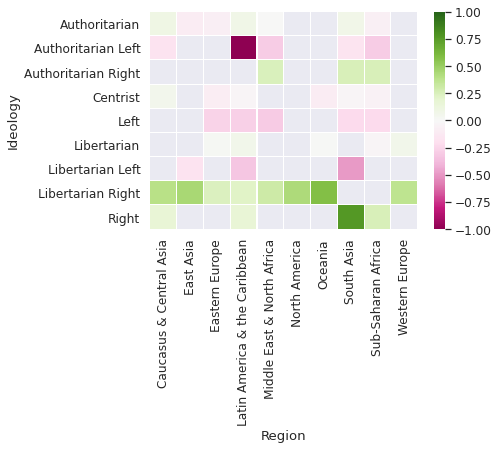

In [366]:
# heatmap of Ideology and Region on pivot of Economic Index Score
# create pivot tables
fp = mfi.pivot_table(index='Ideology', columns='Region', values='Economic Index Score')
sns.heatmap(
    data=fp,
    cmap='PiYG',
    linecolor='white',
    linewidths=.1,
    vmin=-1,
    vmax=1,
    center=0)

## Regression Plots

(-1.0, 1.0)

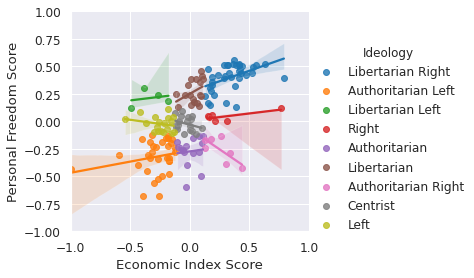

In [367]:
sns.lmplot(
    x='Economic Index Score',
    y='Personal Freedom Score',
    data=mfi,
    # col = 'Region',
    # row = 'Ideology',
    hue = 'Ideology',
    aspect=1.2,
    height=4)
plt.ylim(-1, 1)
plt.xlim(-1, 1)

(-1.0, 1.0)

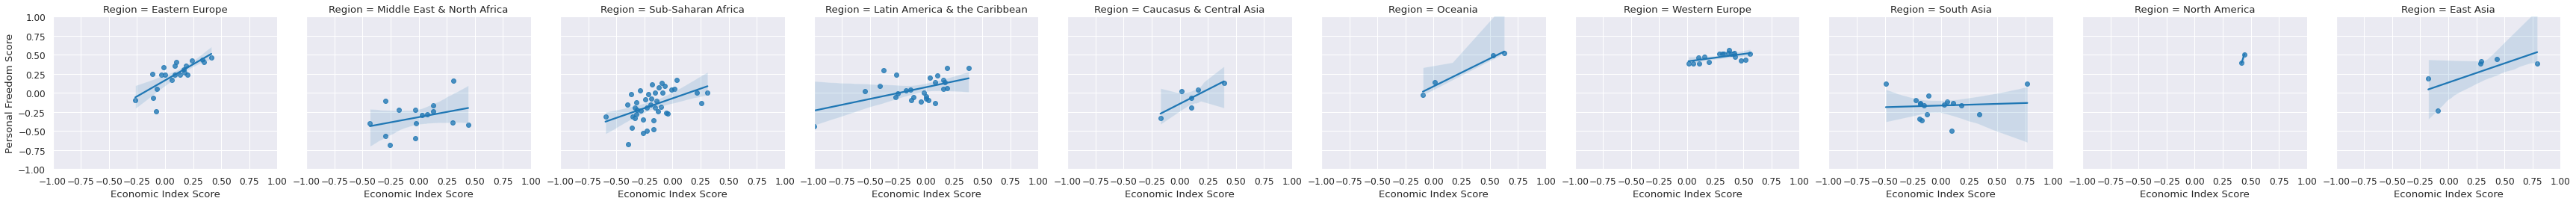

In [368]:
# linear regression plots of economic and personal freedom score for each region 
sns.lmplot(
    x='Economic Index Score',
    y='Personal Freedom Score',
    data=mfi,
    col = 'Region',
    # row = 'Ideology',
    # hue = 'Ideology',
    aspect=1.2,
    height=4)
plt.ylim(-1, 1)
plt.xlim(-1, 1)

# Plotly Interactive Visualizations

## World Maps


In [369]:
# human freedom world map
fig = go.Figure(data=go.Choropleth(
    locations = mfi['ISO Code'], 
    z = mfi['Human Freedom Score'],
    text = mfi['Countries'],
    colorscale = 'viridis',
    reversescale=True,
    colorbar_title = 'Normalized Relative<br>Human Freedom Score',
    marker_line_color='black',
    marker_line_width=.25
))
fig.update_layout(
    title_text='World Map of Comparative Human Freedom Index',
    autosize=True,
    geo=dict(
        showframe=True,
        showcoastlines=True,
        projection_type='equirectangular'),)
fig.show()

In [370]:
# personal freedom world map
fig = go.Figure(data=go.Choropleth(
  locations = mfi['ISO Code'], 
  z = mfi['Personal Freedom Score'],
  text = mfi['Countries'],
  colorscale = 'Earth',
  reversescale=False,
  colorbar_title = 'Normalized Relative<br>Personal Freedom Score',
  marker_line_color='black',
  marker_line_width=.25,
))
fig.update_layout(
  title_text='World Map of Comparative Personal Freedom Index',
  autosize=True,
  geo=dict(showframe=True,showcoastlines=True,projection_type='equirectangular')
)
fig.show()

In [371]:
# economic freedom world map
fig = go.Figure(data=go.Choropleth(locations = mfi['ISO Code'], 
  z = mfi['Economic Index Score'],
  text = mfi['Countries'],
  colorscale = 'Electric',
  reversescale=False,
  colorbar_title = 'Normalized Relative<br>Economic Freedom Score',
  marker_line_color='black',
  marker_line_width=.25,))
fig.update_layout(
    title_text='World Map of Comparative Economic Freedom Index',
    autosize=True,
    geo=dict(showframe=True, showcoastlines=True, projection_type='equirectangular'))
fig.show()
# Create HTML fragment: fig.write_html("worldmap.html")

## Political Compass

In [372]:
sizing = [-1,1]
coloring = {
  "Authoritarian": "#aa55a5",
  "Authoritarian Left": "#3d86c2",
  "Authoritarian Right": "#c33c3f",
  "Centrist": "#768981",
  "Libertarian": "#8dbf40",
  "Libertarian Left": "#47d12e",
  "Libertarian Right": "#efe510",
  "Left": "#42b3bd",
  "Right": "#cc7c33",
}
fig = px.scatter(mfi, 
                hover_name=mfi['Countries'], 
                #hover_data=mfi['ISO Code'],
                x="Economic Index Score",
                y="Personal Freedom Score",
                color=mfi["Ideology"],
                color_discrete_map = coloring,
                size_max=30,
                range_y = sizing,
                range_x = sizing,
                title='International Political Compass: Personal v. Economic Freedom', 
                width=1100, 
                height=700)
fig.show()


## Region Scatterplot

In [373]:
sizing = [-1,1]
fig = px.scatter(mfi, 
                hover_name=mfi['Countries'], 
                #hover_data=mfi['ISO Code'],
                x="Economic Index Score",
                y="Personal Freedom Score",
                color="Region",
                size_max=30,
                range_y = sizing,
                range_x = sizing, 
                title='International Political Compass by Region: Personal v. Economic Freedom', 
                width=1100, 
                height=700)

fig.show()
# Create HTML fragment: fig.write_html("worldmap.html")